In [1]:
import time
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

from Agnes import Agnes
from utils import report
from DBscan import DBscan 

import warnings
warnings.filterwarnings("ignore") 
cmap = 'Spectral'

In [2]:
data = pd.read_csv('datset.csv') 
cat = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
for i in cat:
    data[i] = (data[i].astype('category').cat.codes).apply(np.int64)
X, y = data.drop(['Attrition'], axis=1), data['Attrition']

In [3]:
X, y = np.array(X), list(y)

data_x = data.drop(['Attrition'], axis=1)
X_standardized = np.array((data_x - data_x.mean()) / data_x.std())
X_normalized = np.array(((data_x - data_x.min()) / (data_x.max() - data_x.min())))

# Saving matrices

In [4]:
agnes = Agnes('hamming') 
start = time.time()
agnes.cluster(X, stop=True) 
end = time.time() - start
dist_matrix = agnes.dist_matrix 
file = open('Agnes//Distances_Hamming.pkl', 'wb')
pickle.dump(dist_matrix, file)
end

Calculating distance matrix...


100%|██████████| 1470/1470 [04:11<00:00,  5.84it/s]


251.88884282112122

In [5]:
agnes = Agnes('manhattan') 
start = time.time()
agnes.cluster(X, stop=True) 
end = time.time() - start
dist_matrix = agnes.dist_matrix 
file = open('Agnes//Distances_Manhattan.pkl', 'wb')
pickle.dump(dist_matrix, file)
end

Calculating distance matrix...


100%|██████████| 1470/1470 [00:36<00:00, 40.18it/s]


36.591331005096436

In [6]:
agnes = Agnes('manhattan') 
start = time.time()
agnes.cluster(X_normalized, stop=True) 
end = time.time() - start
dist_matrix = agnes.dist_matrix 
file = open('Agnes//Distances_Manhattan_Norm.pkl', 'wb')
pickle.dump(dist_matrix, file)
end

Calculating distance matrix...


100%|██████████| 1470/1470 [00:40<00:00, 36.18it/s]


40.637150287628174

In [7]:
agnes = Agnes('manhattan') 
start = time.time()
agnes.cluster(X_standardized, stop=True) 
end = time.time() - start
dist_matrix = agnes.dist_matrix 
file = open('Agnes//Distances_Manhattan_Std.pkl', 'wb')
pickle.dump(dist_matrix, file)
end

Calculating distance matrix...


100%|██████████| 1470/1470 [00:41<00:00, 35.48it/s]


41.43507695198059

# Centroids

In [8]:
agnes = Agnes('hamming') 
with open('Agnes//Distances_Hamming.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)

agnes = Agnes('manhattan') 
with open('Agnes//Distances_Manhattan.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan') 
with open('Agnes//Distances_Manhattan_Norm.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan') 
with open('Agnes//Distances_Manhattan_Std.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

Hamming done 182.92126893997192


KeyboardInterrupt: 

AttributeError: module 'numpy' has no attribute 'matrix'

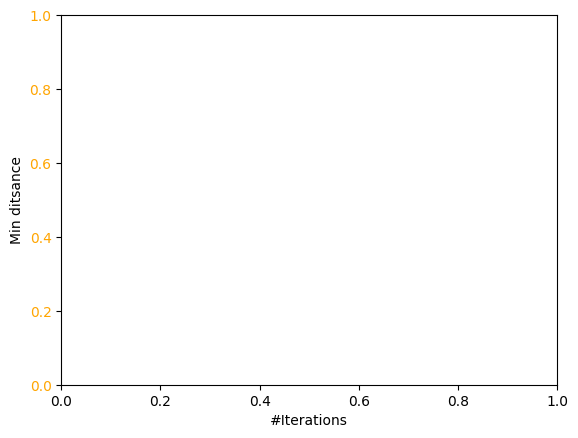

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_H, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_H, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

AttributeError: module 'numpy' has no attribute 'matrix'

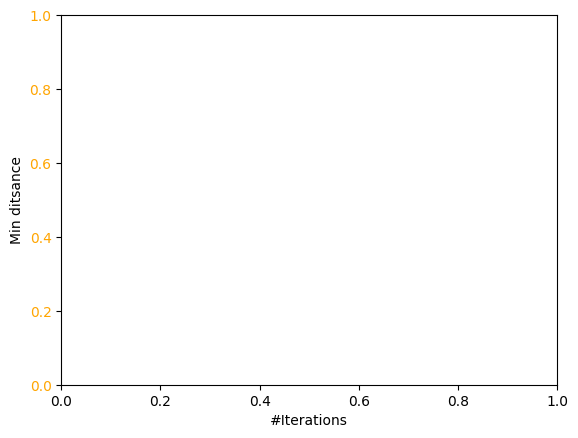

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

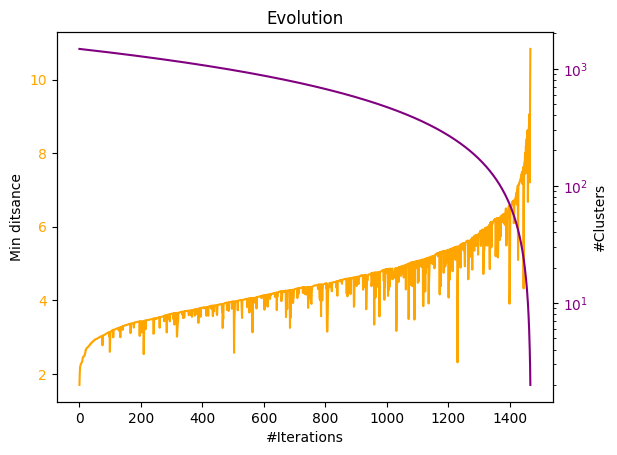

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

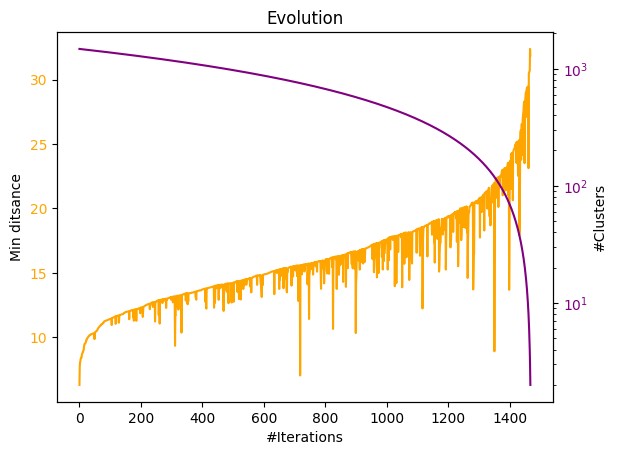

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
clusters_H.keys(), clusters_M.keys(), clusters_N.keys(), clusters_S.keys()

(dict_keys([0, 28]),
 dict_keys([0, 18]),
 dict_keys([0, 171]),
 dict_keys([0, 171]))

In [ ]:
yes_H, no_H = clusters_H.values[1], clusters_H.values[0]
yes_M, no_M = clusters_M.values[1], clusters_M.values[0]
yes_N, no_N = clusters_N.values[1], clusters_N.values[0]
yes_S, no_S = clusters_S.values[1], clusters_S.values[0]

predicted_H = [1 if i in yes_H else 0 for i in range(len(X))] 
predicted_M = [1 if i in yes_M else 0 for i in range(len(X))] 
predicted_N = [1 if i in yes_N else 0 for i in range(len(X))] 
predicted_S = [1 if i in yes_S else 0 for i in range(len(X))] 

In [ ]:
report(y, predicted_H)

Classification Report
Class 0
Precision: 0.849
Recall: 0.640
F1-Score: 0.730

Class 1
Precision: 0.179
Recall: 0.409
F1-Score: 0.249

Accuracy: 0.431


In [ ]:
report(y, predicted_M)

Classification Report
Class 0
Precision: 0.825
Recall: 0.879
F1-Score: 0.851

Class 1
Precision: 0.045
Recall: 0.030
F1-Score: 0.036

Accuracy: 0.590


In [ ]:
report(y, predicted_N)

Classification Report
Class 0
Precision: 0.839
Recall: 1.000
F1-Score: 0.913

Class 1
Precision: 1.000
Recall: 0.004
F1-Score: 0.008

Accuracy: 0.723


In [ ]:
report(y, predicted_S)

Classification Report
Class 0
Precision: 0.839
Recall: 1.000
F1-Score: 0.913

Class 1
Precision: 1.000
Recall: 0.004
F1-Score: 0.008

Accuracy: 0.723


# Single

In [ ]:
agnes = Agnes('hamming', 'single') 
with open('Agnes//Distances_Hamming.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)

agnes = Agnes('manhattan', 'single') 
with open('Agnes//Distances_Manhattan.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan', 'single') 
with open('Agnes//Distances_Manhattan_Norm.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan', 'single') 
with open('Agnes//Distances_Manhattan_Std.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_H, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_H, color='purple', label='#Clusters')
ax2.set_yscale('log') 
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
clusters_H.keys(), clusters_M.keys(), clusters_N.keys(), clusters_S.keys()

In [ ]:
yes_H, no_H = clusters_H.values[1], clusters_H.values[0]
yes_M, no_M = clusters_M.values[1], clusters_M.values[0]
yes_N, no_N = clusters_N.values[1], clusters_N.values[0]
yes_S, no_S = clusters_S.values[1], clusters_S.values[0]

predicted_H = [1 if i in yes_H else 0 for i in range(len(X))] 
predicted_M = [1 if i in yes_M else 0 for i in range(len(X))] 
predicted_N = [1 if i in yes_N else 0 for i in range(len(X))] 
predicted_S = [1 if i in yes_S else 0 for i in range(len(X))] 

In [ ]:
report(y, predicted_H)

In [ ]:
report(y, predicted_M)

In [ ]:
report(y, predicted_N)

In [ ]:
report(y, predicted_S)

# Complete

In [ ]:
agnes = Agnes('hamming', 'complete') 
with open('Agnes//Distances_Hamming.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)

agnes = Agnes('manhattan', 'complete') 
with open('Agnes//Distances_Manhattan.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan',  'complete') 
with open('Agnes//Distances_Manhattan_Norm.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan', 'complete') 
with open('Agnes//Distances_Manhattan_Std.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_H, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_H, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
clusters_H.keys(), clusters_M.keys(), clusters_N.keys(), clusters_S.keys()

In [ ]:
yes_H, no_H = clusters_H.values[1], clusters_H.values[0]
yes_M, no_M = clusters_M.values[1], clusters_M.values[0]
yes_N, no_N = clusters_N.values[1], clusters_N.values[0]
yes_S, no_S = clusters_S.values[1], clusters_S.values[0]

predicted_H = [1 if i in yes_H else 0 for i in range(len(X))] 
predicted_M = [1 if i in yes_M else 0 for i in range(len(X))] 
predicted_N = [1 if i in yes_N else 0 for i in range(len(X))] 
predicted_S = [1 if i in yes_S else 0 for i in range(len(X))] 

In [ ]:
report(y, predicted_H)

In [ ]:
report(y, predicted_M)

In [ ]:
report(y, predicted_N)

In [ ]:
report(y, predicted_S)

# Average

In [ ]:
agnes = Agnes('hamming', 'average') 
with open('Agnes//Distances_Hamming.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)

agnes = Agnes('manhattan', 'average') 
with open('Agnes//Distances_Manhattan.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan',  'average') 
with open('Agnes//Distances_Manhattan_Norm.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan', 'average') 
with open('Agnes//Distances_Manhattan_Std.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_H, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_H, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
clusters_H.keys(), clusters_M.keys(), clusters_N.keys(), clusters_S.keys()

In [ ]:
yes_H, no_H = clusters_H.values[1], clusters_H.values[0]
yes_M, no_M = clusters_M.values[1], clusters_M.values[0]
yes_N, no_N = clusters_N.values[1], clusters_N.values[0]
yes_S, no_S = clusters_S.values[1], clusters_S.values[0]

predicted_H = [1 if i in yes_H else 0 for i in range(len(X))] 
predicted_M = [1 if i in yes_M else 0 for i in range(len(X))] 
predicted_N = [1 if i in yes_N else 0 for i in range(len(X))] 
predicted_S = [1 if i in yes_S else 0 for i in range(len(X))] 

In [ ]:
report(y, predicted_H)

In [ ]:
report(y, predicted_M)

In [ ]:
report(y, predicted_N)

In [ ]:
report(y, predicted_S)

# Ward

In [ ]:
agnes = Agnes('hamming', 'ward') 
with open('Agnes//Distances_Hamming.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_H, distances_H, nb_clusters_H = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Hamming done', end)

agnes = Agnes('manhattan', 'ward') 
with open('Agnes//Distances_Manhattan.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_M, distances_M, nb_clusters_M = agnes.cluster(X, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan done', end)

agnes = Agnes('manhattan',  'ward') 
with open('Agnes//Distances_Manhattan_Norm.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_N, distances_N, nb_clusters_N = agnes.cluster(X_normalized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Norm done', end)

agnes = Agnes('manhattan', 'ward') 
with open('Agnes//Distances_Manhattan_Std.pkl', 'rb') as f:
    dist_matrix = pickle.load(f) 
start = time.time()
clusters_S, distances_S, nb_clusters_S = agnes.cluster(X_standardized, dist_matrix=dist_matrix) 
end = time.time() - start
print('Manhattan Std done', end)

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_H, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_H, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_M, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_M, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_N, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_N, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(distances_S, color='orange', label='Min Ditsance')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_xlabel('#Iterations')
ax.set_ylabel('Min ditsance')

ax2 = ax.twinx()
ax2.plot(nb_clusters_S, color='purple', label='#Clusters')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('#Clusters')

ax.set_title('Evolution')
plt.show()

In [ ]:
clusters_H.keys(), clusters_M.keys(), clusters_N.keys(), clusters_S.keys()

In [ ]:
yes_H, no_H = clusters_H.values[1], clusters_H.values[0]
yes_M, no_M = clusters_M.values[1], clusters_M.values[0]
yes_N, no_N = clusters_N.values[1], clusters_N.values[0]
yes_S, no_S = clusters_S.values[1], clusters_S.values[0]

predicted_H = [1 if i in yes_H else 0 for i in range(len(X))] 
predicted_M = [1 if i in yes_M else 0 for i in range(len(X))] 
predicted_N = [1 if i in yes_N else 0 for i in range(len(X))] 
predicted_S = [1 if i in yes_S else 0 for i in range(len(X))] 

In [ ]:
report(y, predicted_H)

In [ ]:
report(y, predicted_M)

In [ ]:
report(y, predicted_N)

In [ ]:
report(y, predicted_S)